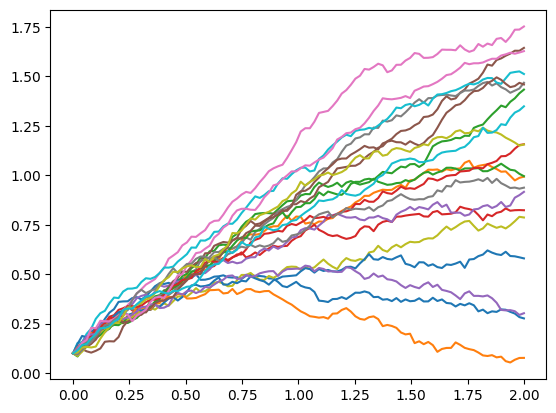

<function matplotlib.pyplot.show(close=None, block=None)>

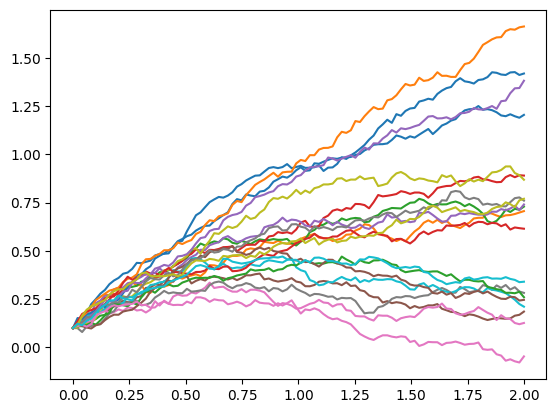

In [1]:
from src.data_generate_sde import sde_cell_model, time
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

x0 = [.1, .1]
y= [1.5, 0.5]
T = 2.
N = 100
ts = time.grid(0, T, N)


keys = jax.random.split(jax.random.PRNGKey(0), 20)
data_fn = sde_cell_model.data_forward(x0, T, N)
_, forward_trajs, correction = data_fn(keys)

for traj in forward_trajs:
    plt.plot(ts, traj[..., 0])
plt.show()
    
for traj in forward_trajs:
    plt.plot(ts, traj[..., 1])
plt.show


24


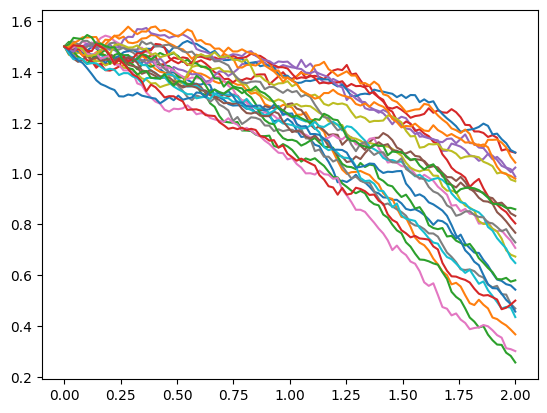

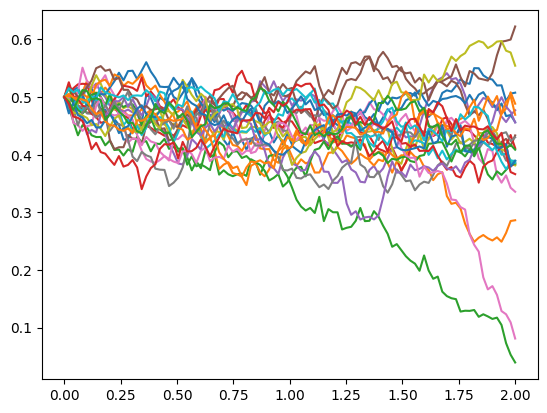

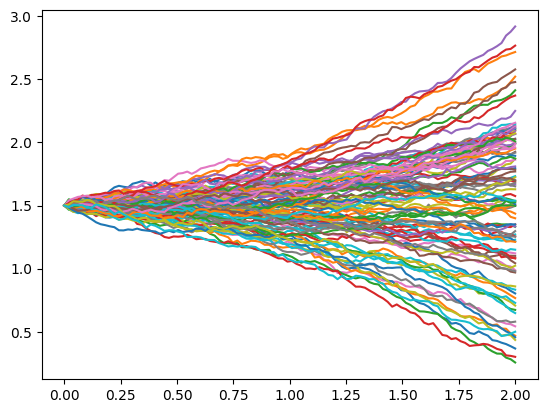

<function matplotlib.pyplot.show(close=None, block=None)>

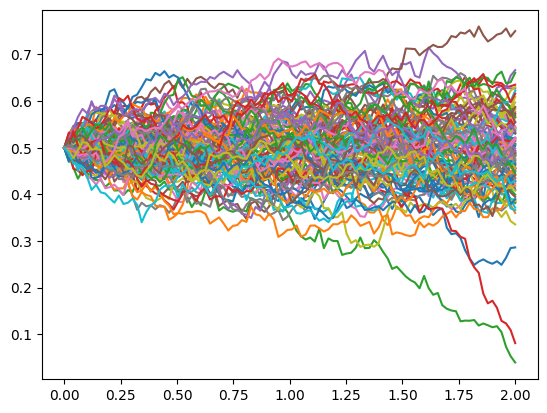

In [2]:
from src.data_generate_sde import sde_cell_model, time
import matplotlib.pyplot as plt
import jax

# y = [1., 1.]
# T = 2.
# N = 100
# ts = time.grid(0, T, N)


keys = jax.random.split(jax.random.PRNGKey(0), 100)

weight_fn = sde_cell_model.weight_function(x0, jnp.identity(2))
data_fn = sde_cell_model.data_reverse(y, T, N, weight_fn)
_, rev_trajs, correction, weight = data_fn(keys)

def good_condition(traj):
    return abs(traj[-1, 0] - 0.1)<1 and abs(traj[-1, 1] - 0.5)<1

good_trajectories = [traj for traj in rev_trajs if good_condition(traj)]
print(len(good_trajectories))

for traj in good_trajectories:
        plt.plot(ts, traj[..., 0])
plt.show()
    
for traj in good_trajectories:
    plt.plot(ts, traj[..., 1])
plt.show()

for traj in rev_trajs:
        plt.plot(ts, traj[..., 0])
plt.show()
    
for traj in rev_trajs:
    plt.plot(ts, traj[..., 1])
plt.show

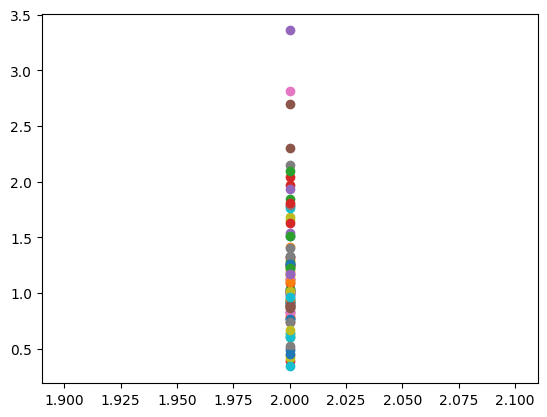

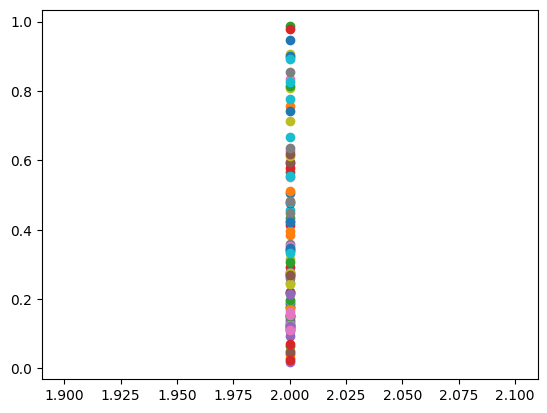

In [3]:
for c in correction:
    plt.scatter(ts[-1], c)
plt.show()

for w in weight:
    plt.scatter(ts[-1], w)

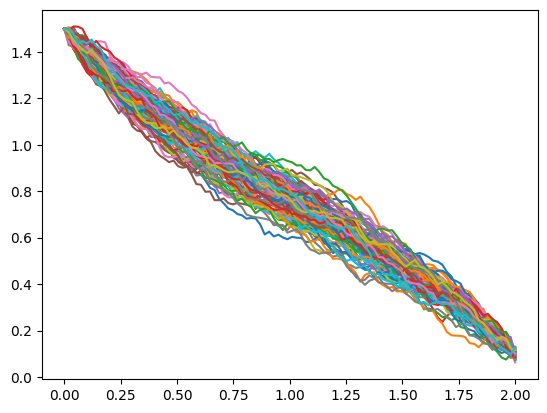

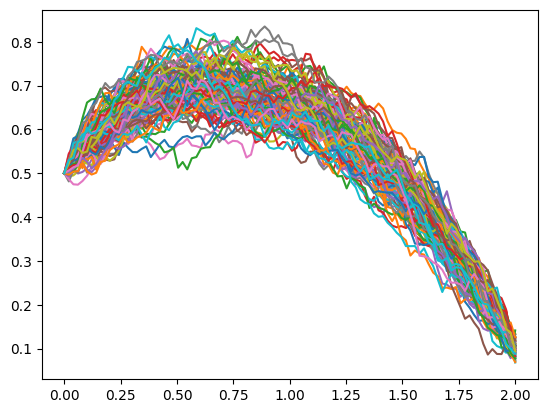

In [4]:
data_fn = sde_cell_model.data_reverse_guided(x0, y, T, N)
_, rev_trajs, correction = data_fn(keys)

for traj in rev_trajs:
    plt.plot(ts, traj[..., 0])
plt.show()

for traj in rev_trajs:
    plt.plot(ts, traj[..., 1])
plt.show()
